<a href="https://colab.research.google.com/github/Michell-Piazza/EDA_Brazilian_cities/blob/main/Analise_cidades_brasileiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados das Cidades do Brasil**


Neste notebook, realizamos uma Análise Exploratória de Dados (AED) das cidades do Brasil. O objetivo é explorar diversas características demográficas e socioeconômicas das cidades brasileiras, fornecendo insights valiosos sobre sua distribuição populacional, Índice de Desenvolvimento Humano (IDH), distribuição geográfica, entre outros aspectos.

Para isso, utilizamos um conjunto de dados abrangente que inclui informações sobre população, IDH, localização geográfica e outras variáveis relevantes para cada cidade. Vamos começar explorando algumas visualizações que nos ajudarão a compreender melhor essas informações.

# 1. Importação das bibliotecas necessárias


In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.ticker as ticker
import matplotlib.cm as cm

> Configurando as opções do pandas para exibir todas as colunas e todas as linhas do DataFrame.

In [2]:
# Setting pandas options to display all columns and all rows of the DataFrame.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


>Montagem do Google Drive para acesso aos dados armazenados.

In [3]:
# Mounting Google Drive to access stored data.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 >Carregamento dos dados

In [4]:
# Loading CSV data using pandas, and decimal point as ",".
df = pd.read_csv("/content/drive/MyDrive/Arquivos Públicos/BRAZIL_CITIES_REV2022.CSV", decimal=",")
df.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,69,318,438,517,3542,416,319,1843,1689,0.7080,0.6870,0.8300,0.6220,-49.4405,-16.7588,893.6015,360,842,147.2560,0,0,8583,Urbano,6201,27991,74750,36915,145858,20554,166412,8053,20665.0000,Demais serviços,28227690,284,5,1,56,0,2,29,110,26,4,5,0,2,10,12,4,6,6,1,5,0,0,0,0,0,0,0,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,38,207,260,351,2709,589,4479,18017,2207,0.6890,0.6930,0.8390,0.5630,-47.3968,-18.4876,753.1249,77,296,881.0640,Caminhos Do Cerrado,D,6972,Rural Adjacente,50525,25918,62689,28084,167215,12873,180089,7037,25592.0000,Demais serviços,17909274,476,6,6,30,1,2,34,190,70,28,11,0,4,15,29,2,9,14,6,19,0,0,0,0,0,0,0,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,139,650,894,1087,6896,990,10307,33085,2202,0.6890,0.6710,0.8410,0.5790,-48.7188,-16.1827,1017.5506,227,720,1045.1270,Região Turística Do Ouro E Cristais,C,19614,Rural Adjacente,42839,16728,138199,63396,261162,26823,287984,18427,15628.0000,Demais serviços,37513019,288,5,9,26,0,2,7,117,12,57,2,1,0,7,15,3,11,5,1,8,0,0,1,34,1,1,1,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,1354,5567,7618,8905,53516,5996,25200,700872,3530,0.6280,0.5790,0.7980,0.5370,-48.8844,-1.7235,10.1203,3389,1218,1610.6510,Araguaia-Tocantins,D,156292,Urbano,140464,58610,468129,486872,1154075,95180,1249255,151934,8222.0000,"Administração, defesa, educação e saúde públic...",0,931,4,2,43,0,1,27,500,16,31,6,1,1,22,16,2,155,33,15,56,0,0,0,0,2,4,2,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,176,856,1233,1539,11979,2681,1862,7502,1994,0.6980,0.7200,0.8480,0.5560,-45.4462,-19.1558,644.7399,1230,1716,1817.0670,Lago De Três Marias,D,23223,Urbano,113825,31003,172333,86081,403241,26994,430235,23574,18250.0000,Demais serviços,0,621,18,1,40,0,1,20,303,62,30,9,6,4,28,27,2,15,19,9,27,0,0,0,0,2,2,2,2,44974716,371922572,6928,2953,0,0,0,0,4


# 2. Dicionário


Segue a descrição das colunas caso o usuário tenha alguma dúvida:

FIELD - DESCRIPTION - REFERENCE - UNIT - SOURCE

CITY - Name of the City

STATE - Name of the State

CAPITAL - 1 if Capital of State

IBGE_RES_POP - Resident Population - 2010 -

IBGE_RES_POP_BRAS - Resident Population Brazilian - 2010 -

IBGE_RES_POP_ESTR - Redident Population Foreigners - 2010 -

IBGE_DU - Domestic Units Total - 2010 -

IBGE_DU_URBAN - Domestic Units Urban - 2010 -

IBGE_DU_RURAL - Domestic Units Rural 2010 -

IBGE_POP - Resident Population Regular Urban Planning - 2010 -

IBGE_1 - Resident Population Regular Urban Planning - until 1 y.o - 2010 -

IBGE_1-4 - Resident Population Regular Urban Planning - from 1 to 4 y.o - 2010 -

IBGE_5-9 - Resident Population Regular Urban Planning - from 4 to 9 y.o - 2010 -

IBGE_10-14 - Resident Population Regular Urban Planning - from 10 to 14 y.o - 2010 -

IBGE_15-59 - Resident Population Regular Urban Planning - from 15 to 59 y.o 2010 -

IBGE_60+ - Resident Population Regular Urban Planning - above 60 y.o - 2010 -

IBGE_PLANTED_AREA - Planted Area (hectares) - 2017 - 1 hectare (1 hectare = 10,000 square meters) -

IBGE_CROPPRODUCTION
−
C
r
o
p
P
r
o
d
u
c
t
i
o
n
−
2017
−
  1,000 reais -

IDHM Ranking - HDI Ranking - 2010 -

IDHM - HDI Human Development Index - 2010 -

IDHM_Renda - HDI GNI Index - 2010 -

IDHM_Longevidade - HDI Life Expectancy index - 2010 -

IDHM_Educacao HDI Education index - 2010 -

LONG - City Longitude - 2010 -

LAT - City Latitude - 2010 -

ALT - City Elevation (meters) - 2010 - 1 meter -

PAY_TV - PayTV users - 2019-03 -

FIXED_PHONES - Fixed Fones (not cell phones) users - 2019-03 -

AREA - City area (square kilometers) - 2018 - 1 square Kilometer (1 kilometer = 1,000,000 square meters) -

REGIAO_TUR - Turism Category Region - 2017 -

CATEGORIA_TUR - Turism Category - 2017 -

ESTIMATED_POP - Estimated Population - 2018-07 -

RURAL_URBAN - Rural or Urban Tipology - 2016 -

GVA_AGROPEC - Gross Added Value - Agropecuary - 2016 - $ 1,000 reais -

GVA_INDUSTRY - Gross Added Value - Industry - 2016 - $ 1,000 reais -

GVA_SERVICES - Gross Added Value - Services - 2016 - $ 1,000 reais -

GVA_PUBLIC - Gross Added Value - Public Services - 2016 - $ 1,000 reais -

GVA_TOTAL Total Gross Added Value - 2016 - $ 1,000 reais -

TAXES - Taxes - 2016 - $ 1,000 - reais -

GDP - Gross Domestic Product - 2016 - $ 1,000 reais -

POP_GDP - Population - 2016 -

GDP_CAPITA - Gross Domestic Product per capita - 2016 -

GVA_MAIN - Activity with higher GVA contribution - 2016 -

MUN_EXPENDIT - Municipal expenditures - in reais - 2016 - $ 1 real -

COMP_TOT - Total number of companies 2016 -

COMP_A Number of Companies: Agriculture, livestock, forestry, fishing and aquaculture - 2016 -

COMP_B Number of Companies: Extractive industries 2016 -

COMP_C Number of Companies: Industries of transformation - 2016 -

COMP_D Number of Companies: Electricity and gas - 2016 -

COMP_E Number of Companies: Water, sewage, waste management and decontamination activities - 2016 -

COMP_F Number of Companies: Construction - 2016 -

COMP_G - Number of Companies: Trade; repair of motor vehicles and motorcycles - 2016 -

COMP_H - Number of Companies: Transport, storage and mail - 2016 -

COMP_I - Number of Companies: Accommodation and food - 2016 -

COMP_J - Number of Companies: Information and communication - 2016 -

COMP_K - Number of Companies: Financial, insurance and related services activities - 2016 -

COMP_L - Number of Companies: Real estate activities - 2016 -

COMP_M - Number of Companies: Professional, scientific and technical activities - 2016 -

COMP_N - Number of Companies: Administrative activities and complementary services - 2016 -

COMP_O - Number of Companies: Public administration, defense and social security - 2016 -

COMP_P - Number of Companies: Education - 2016 -

COMP_Q - Number of Companies: Human health and social services - 2016 -

COMP_R - Number of Companies: Arts, culture, sport and recreation - 2016 -

COMP_S - Number of Companies: Other service activities - 2016 -

COMP_T - Number of Companies: Domestic services - 2016 -

COMP_U - Number of Companies: International and other extraterritorial institutions - 2016 -

HOTELS - Total number of hotels - 2019-03 -

BEDS - Total number of hotel beds - 2019-03 -

Pr_Agencies - Total number of private bank agencies - 2019-02 -

Pu_Agencies - Total number of public bank agencies - 2019-02 -

Pr_Bank - Total number of private banks - 2019-02 -

Pu_Bank - Total number of public banks 2019-02 -

Pr_Assets - Total amount of private bank assets - 2019-02 $ 1 real

Pu_Assets - Total amount of public bank assets - 2019-02 $ 1 real

Cars - Total number of cars - 2019-01 -

Motorcycles - Total number of motorcycles, scooters, moped - 2019-01 -

Wheeled_tractor - Total number of wheeled tractors - 2019-01 -

UBER - 1 if UBER 2019-05 -

MAC - Total number of Mac Donalds stores - 2018-11 -

WALLMART - Total number of Walmart Stores - 2018-12 -

POST_OFFICES - Total number of post offices - 2019-05 -

# 3. Análise exploratória - Exploratory analysis


>Visualizando informações resumidas do DataFrame, incluindo o tipo de dados e a contagem de valores não nulos de cada coluna





In [5]:
# Displaying summary information about the DataFrame, including data types and non-null value counts for each column.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITY                    5578 non-null   object
 1   STATE                   5578 non-null   object
 2   CAPITAL                 5578 non-null   int64 
 3   IBGE_RES_POP            5578 non-null   int64 
 4   IBGE_RES_POP_BRAS       5578 non-null   int64 
 5   IBGE_RES_POP_ESTR       5578 non-null   int64 
 6   IBGE_DU                 5578 non-null   int64 
 7   IBGE_DU_URBAN           5578 non-null   int64 
 8   IBGE_DU_RURAL           5578 non-null   int64 
 9   IBGE_POP                5578 non-null   int64 
 10  IBGE_1                  5578 non-null   int64 
 11  IBGE_1-4                5578 non-null   int64 
 12  IBGE_5-9                5578 non-null   int64 
 13  IBGE_10-14              5578 non-null   int64 
 14  IBGE_15-59              5578 non-null   int64 
 15  IBGE

>Retornando a forma (número de linhas e colunas) do DataFrame.

In [6]:
# Returning the shape (number of rows and columns) of the DataFrame.
df.shape


(5578, 81)

> Listando os nomes das colunas presentes no DataFrame

In [7]:
# Listing the names of the columns present in the DataFrame.
df.columns



Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       'GVA_TOTAL', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'Pr_

> Renomeando as colunas do DataFrame para melhor clareza e legibilidade

In [8]:
# Renaming the columns of the DataFrame for better clarity and readability.
df.rename(columns={'IBGE_RES_POP': 'Population(2010)',
                   'IDHM':'Human Development Index Ranking',
                   'ESTIMATED_POP':'Estimated Population(2018)',
                   'COMP_TOT':'Total companies',
                   'UBER':'Uber',
                   'POST_OFFICES':'Post Offices'}, inplace=True)


>Calculando o número de valores nulos em cada coluna do DataFrame e exibindo o resultado.

In [9]:
# Calculating the number of null values in each DataFrame column and displaying the result.
null_counts = df.isnull().sum()
print(null_counts)


CITY                               0
STATE                              0
CAPITAL                            0
Population(2010)                   0
IBGE_RES_POP_BRAS                  0
IBGE_RES_POP_ESTR                  0
IBGE_DU                            0
IBGE_DU_URBAN                      0
IBGE_DU_RURAL                      0
IBGE_POP                           0
IBGE_1                             0
IBGE_1-4                           0
IBGE_5-9                           0
IBGE_10-14                         0
IBGE_15-59                         0
IBGE_60+                           0
IBGE_PLANTED_AREA                  0
IBGE_CROP_PRODUCTION_$             0
IDHM Ranking 2010                  0
Human Development Index Ranking    0
IDHM_Renda                         0
IDHM_Longevidade                   0
IDHM_Educacao                      0
LONG                               0
LAT                                0
ALT                                0
PAY_TV                             0
F

> Removendo duplicatas com base na coluna 'CITY' e calculando o crescimento populacional percentual.

In [10]:
# Dropping duplicates based on the 'CITY' column and calculating the population growth percentage.
df = df.drop_duplicates(subset='CITY', keep='first')
df['Population Growth %'] = ((df['Estimated Population(2018)'] - df['Population(2010)']) / df['Population(2010)']) * 100


<ipython-input-10-18a112b3f745>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population Growth %'] = ((df['Estimated Population(2018)'] - df['Population(2010)']) / df['Population(2010)']) * 100


>Contando a frequência dos valores únicos na coluna 'STATE' e exibindo a forma do resultado.

In [11]:
# Counting the frequency of unique values in the 'STATE' column and displaying the shape of the result.
df["STATE"].value_counts().shape


(27,)

> Quantidade de cidades por estado

In [12]:
# Number of cities per state
df["STATE"].value_counts()


STATE
MG    828
SP    623
RS    483
BA    392
PR    375
SC    277
GO    237
PI    218
MA    209
PB    193
CE    174
PE    171
RN    151
MT    138
PA    137
TO    132
AL     93
RJ     91
ES     75
MS     73
SE     68
AM     60
RO     51
AC     20
AP     16
RR     14
DF      1
Name: count, dtype: int64

# 4. Visualização de dados - Data visualization

> Distribuição das cidades brasileiras.

<ipython-input-13-b1d67ff77044>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LONG'] = df['LONG'].astype(float)
<ipython-input-13-b1d67ff77044>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LAT'] = df['LAT'].astype(float)
<ipython-input-13-b1d67ff77044>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

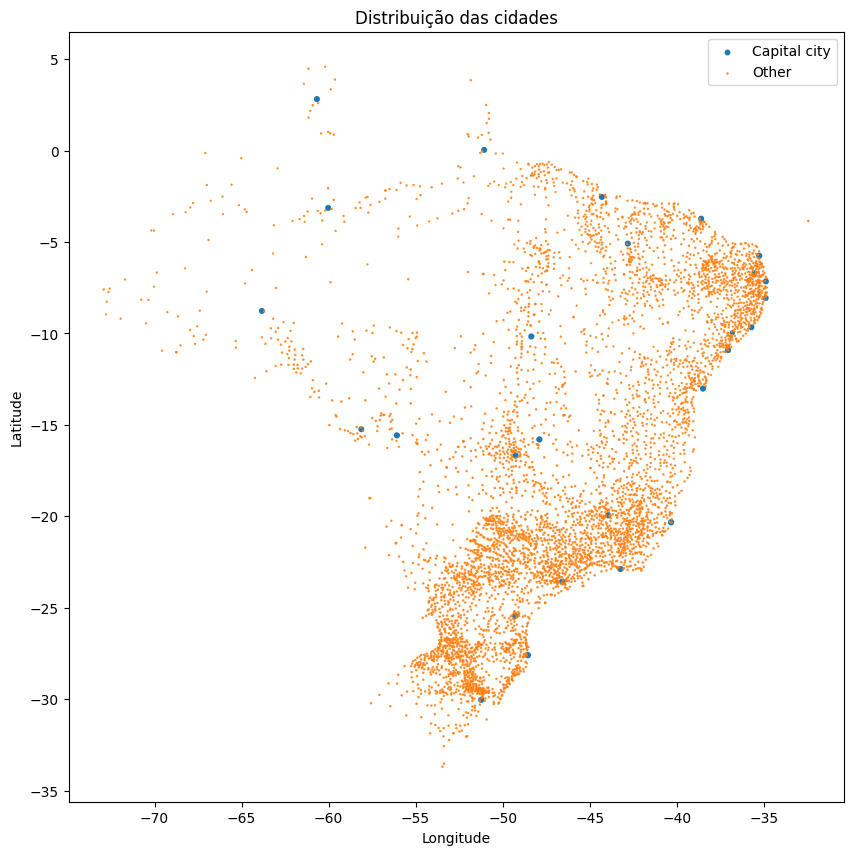

In [13]:
# Distribution of Brazilian cities.

df['LONG'] = df['LONG'].astype(float)
df['LAT'] = df['LAT'].astype(float)
df['Human Development Index Ranking'] = df['Human Development Index Ranking'].astype(float)

# remove zero values
mask1 = df["LONG"] != 0
mask2 = df["LAT"] != 0
mask3 = df['CAPITAL'] == 1

x_capital = df[mask1 & mask2 & mask3]["LONG"]
y_capital = df[mask1 & mask2 & mask3]["LAT"]
z_capital = df[mask1 & mask2 & mask3]["Human Development Index Ranking"]

x_other = df[mask1 & mask2 & ~mask3]["LONG"]
y_other = df[mask1 & mask2 & ~mask3]["LAT"]
z_other = df[mask1 & mask2 & ~mask3]["Human Development Index Ranking"]

# use the scatter function
plt.figure(figsize=(10,10))
plt.title("Distribuição das cidades")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Scatter plot for capital cities
plt.scatter(x_capital, y_capital, s=z_capital*15, alpha=1, label='Capital city')

# Scatter plot for other cities
plt.scatter(x_other, y_other, s=z_other, alpha=0.8, label='Other')

plt.legend()
plt.show()


>Adicionando as delimitações dos estados

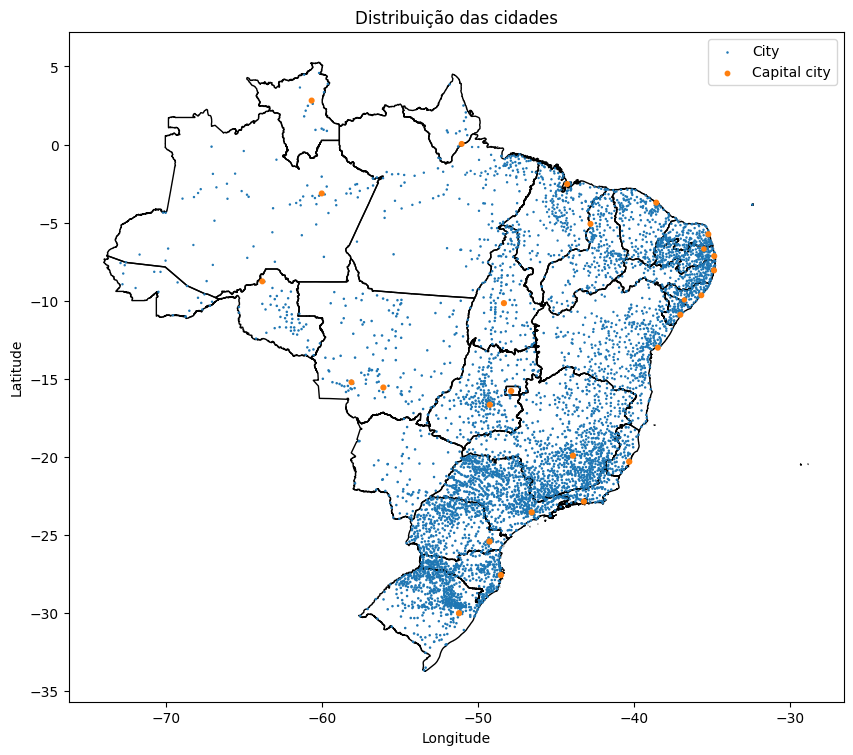

In [14]:


# Carregar o shapefile dos estados do Brasil
estados = gpd.read_file('/content/drive/MyDrive/Arquivos Públicos/BR_UF_2021.shx')

# Distribuição das cidades brasileiras.
df['LONG'] = df['LONG'].astype(float)
df['LAT'] = df['LAT'].astype(float)
df['Human Development Index Ranking'] = df['Human Development Index Ranking'].astype(float)

# remove valores zero
mask1 = df["LONG"] != 0
mask2 = df["LAT"] != 0
mask3 = df['CAPITAL'] == 1

x_other = df[mask1 & mask2 & ~mask3]["LONG"]
y_other = df[mask1 & mask2 & ~mask3]["LAT"]
z_other = df[mask1 & mask2 & ~mask3]["Human Development Index Ranking"]

x_capital = df[mask1 & mask2 & mask3]["LONG"]
y_capital = df[mask1 & mask2 & mask3]["LAT"]
z_capital = df[mask1 & mask2 & mask3]["Human Development Index Ranking"]

# Configurando o gráfico
plt.figure(figsize=(10,10))
plt.title("Distribuição das cidades")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Plotar as delimitações dos estados brasileiros
estados.plot(ax=plt.gca(), color='none', edgecolor='black')

# Plotar as outras cidades
plt.scatter(x_other, y_other, s=z_other, alpha=1, label='City')

# Plotar as cidades capitais
plt.scatter(x_capital, y_capital, s=z_capital*15, alpha=1, label='Capital city')

plt.legend()
plt.show()


> Distribuição da população

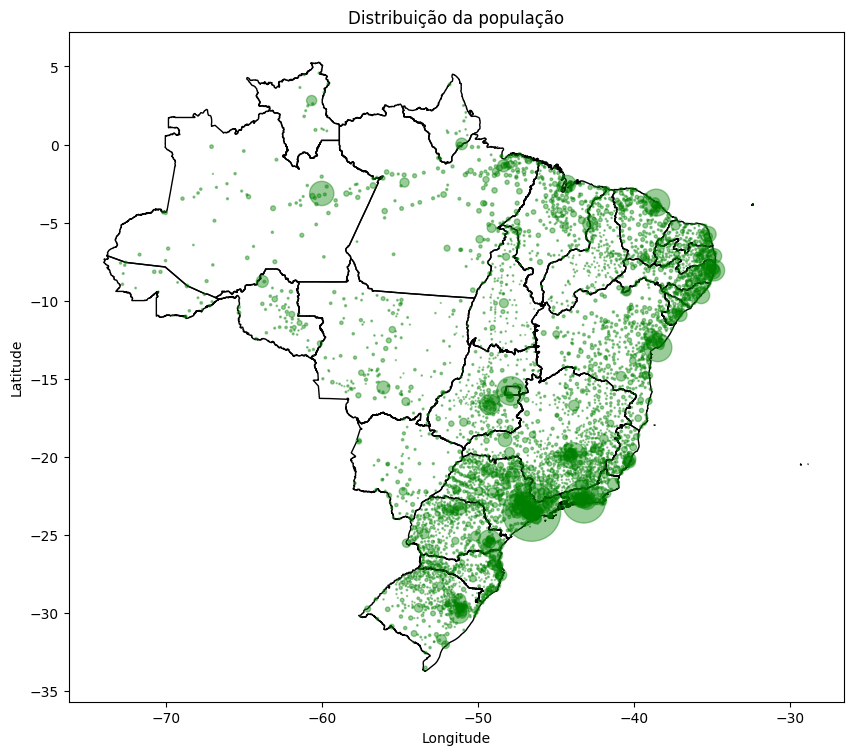

In [15]:
# Population distribution

# Carregar o shapefile dos estados do Brasil
estados = gpd.read_file("/content/drive/MyDrive/Arquivos Públicos/BR_UF_2021.shx")

# remove zero values
mask1 = df["LONG"] != 0
mask2 = df["LAT"] != 0

x = df[mask1 & mask2]["LONG"]
y = df[mask1 & mask2]["LAT"]
z = df[mask1 & mask2]["Estimated Population(2018)"]

# Configurar o gráfico
plt.figure(figsize=(10,10))
plt.title("Distribuição da população")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Plotar as delimitações dos estados brasileiros
estados.plot(ax=plt.gca(), color='none', edgecolor='black')

# Usar a função scatter para plotar a distribuição da população
plt.scatter(x, y, s=z/7000, alpha=0.4, color = 'green')

plt.show()


> Total e crescimento da população

In [16]:
# total population (2018)
print(f"População total (2018): {df['Estimated Population(2018)'].sum():10.0f}")

# % growth between 2010 and 2018
avg_growth = (df['Estimated Population(2018)'].sum()-df['Population(2010)'].sum())/df['Population(2010)'].sum()*100
print(f"% crescimento da população entre 2010 e 2018: {avg_growth:2.2f}")


População total (2018):  199041983
% crescimento da população entre 2010 e 2018: 9.31


> População por estado (2018)

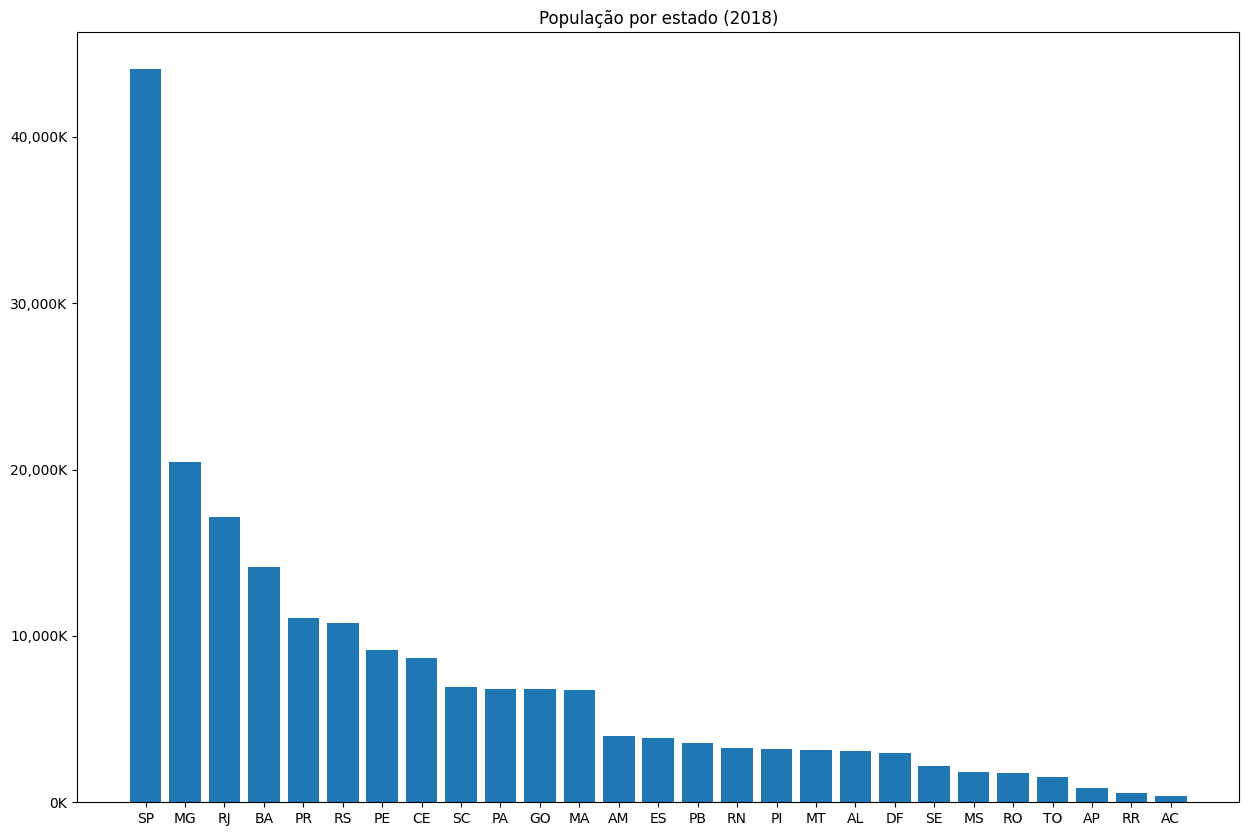

In [17]:
# Population by state (2018)
pop_by_state = df[['STATE','Estimated Population(2018)']].groupby(by="STATE").sum().sort_values(by="Estimated Population(2018)", ascending=False)
plt.figure(figsize=(15,10))
plt.bar(pop_by_state.index, pop_by_state['Estimated Population(2018)'])
plt.title("População por estado (2018)")

# Set the format of axis labels and in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


> Estados com maior crescimento populacional

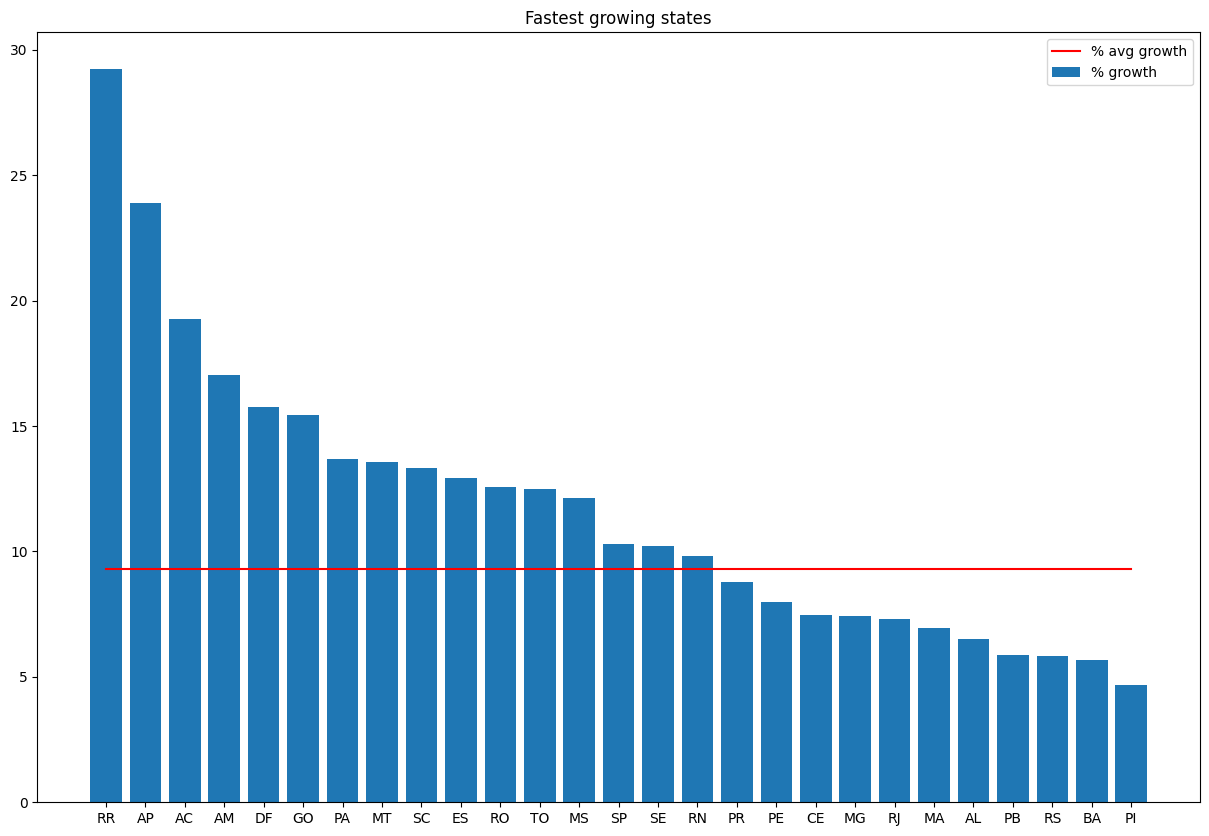

In [18]:
# Fastest growing states
fastest_growing_states = df[['STATE','Population(2010)','Estimated Population(2018)']].groupby(by="STATE").sum()
fastest_growing_states['%GROWTH'] = (fastest_growing_states['Estimated Population(2018)']-fastest_growing_states['Population(2010)'])/fastest_growing_states['Population(2010)']*100
fgs = fastest_growing_states.sort_values(by="%GROWTH", ascending=False)
plt.figure(figsize=(15,10))
plt.bar(fgs.index, fgs['%GROWTH'], label='% growth')
plt.plot(fgs.index, [avg_growth]*fgs.index.shape[0], color='red', label='% avg growth')
plt.legend()
plt.title("Fastest growing states")
plt.show()


> Índice de Desenvolvimento Humano por cidade

In [19]:
# Human Development Index by city
IDH_cidade = df.groupby('CITY')['Human Development Index Ranking'].first().reset_index()
IDH_cidade


,CITY,Human Development Index Ranking
0,Abadia De Goiás,0.708
1,Abadia Dos Dourados,0.689
2,Abadiânia,0.689
3,Abaetetuba,0.628
4,Abaeté,0.698
5,Abaiara,0.628
6,Abaré,0.575
7,Abatiá,0.687
8,Abaíra,0.603
9,Abdon Batista,0.694


>Histograma do IDH das cidades brasileiras

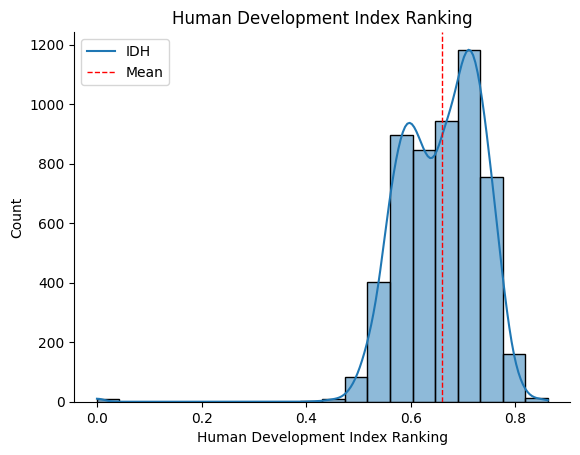

In [20]:

# Plot the histogram and kernel density estimation (KDE)
sns.histplot(data=IDH_cidade, x='Human Development Index Ranking', bins=20, kde=True)
plt.title('Human Development Index Ranking')

# Add a line to represent the mean
mean_idh = np.mean(IDH_cidade['Human Development Index Ranking'])
plt.axvline(mean_idh, color='red', linestyle='dashed', linewidth=1)

# Remove the top and right borders of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legends
plt.legend(['IDH', 'Mean'])

plt.show()



> Classificar as cidades em ordem decrescente com base no IDH

In [21]:
# Sort cities in descending order based on HDI
IDH_cidade_10 = IDH_cidade.sort_values(by=['Human Development Index Ranking'], ascending=False).head(10)

IDH_cidade_10


,CITY,Human Development Index Ranking
4524,São Caetano Do Sul,0.862
5285,Águas De São Pedro,0.854
1691,Florianópolis,0.847
417,Balneário Camboriú,0.845
5221,Vitória,0.845
4331,Santos,0.840
3105,Niterói,0.837
2445,Joaçaba,0.827
676,Brasília,0.824
1385,Curitiba,0.823


> As dez cidades com maiores IDH

<ipython-input-22-001bf3a92f44>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='CITY', y='Human Development Index Ranking', data=IDH_cidade_10_sorted, palette='plasma', ci=None)
<ipython-input-22-001bf3a92f44>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='CITY', y='Human Development Index Ranking', data=IDH_cidade_10_sorted, palette='plasma', ci=None)
<ipython-input-22-001bf3a92f44>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels


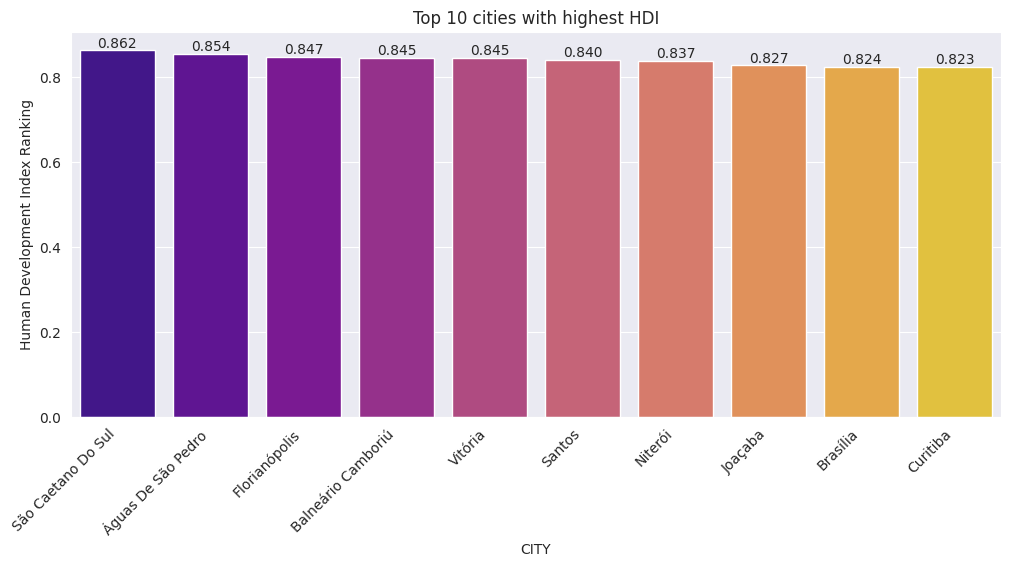

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', axis='y')

# Sort cities by HDI
IDH_cidade_10_sorted = IDH_cidade_10.sort_values(by='Human Development Index Ranking', ascending=False)

# Plot the bar chart with variable heights
ax = sns.barplot(x='CITY', y='Human Development Index Ranking', data=IDH_cidade_10_sorted, palette='plasma', ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels

# Add value labels on bars with 3 decimal places
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.title('Top 10 cities with highest HDI')
plt.show()


> Distribuição do IDH pelo país

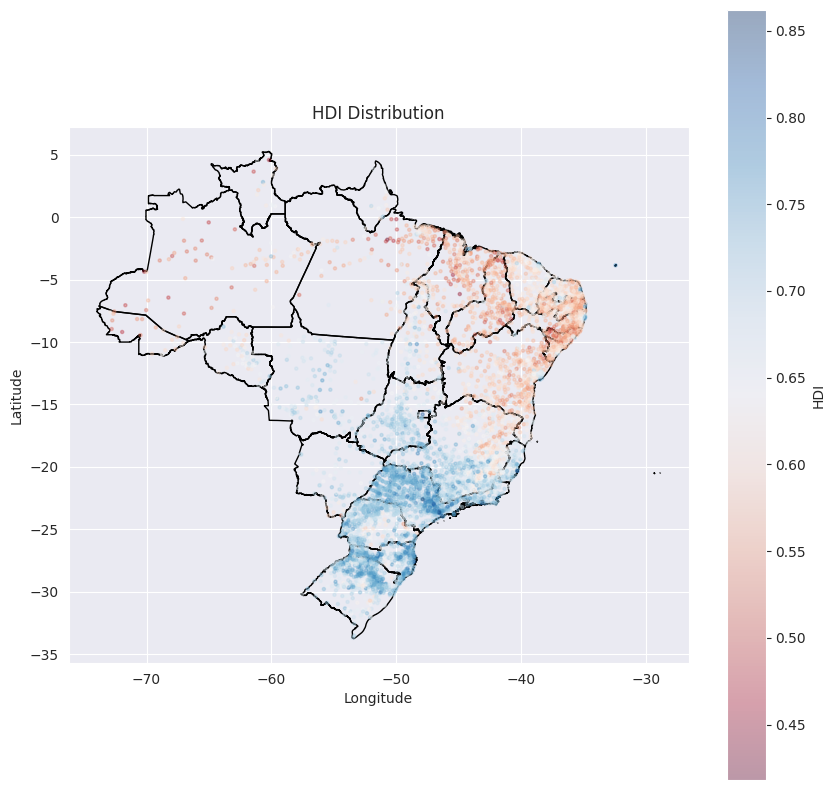

In [23]:
# HDI distribution

# Load the shapefile of Brazilian states
estados = gpd.read_file("/content/drive/MyDrive/Arquivos Públicos/BR_UF_2021.shx")

# remove zero values
mask1 = df["LONG"] != 0
mask2 = df["LAT"] != 0

x = df[mask1 & mask2]["LONG"]
y = df[mask1 & mask2]["LAT"]
z = df[mask1 & mask2]["Human Development Index Ranking"]

# Configure the plot
plt.figure(figsize=(10,10))
plt.title("HDI Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Plot Brazilian states boundaries
estados.plot(ax=plt.gca(), color='none', edgecolor='black')

# Use scatter function to plot the HDI distribution
plt.scatter(x, y, s=5, alpha=0.35, c=z, cmap=cm.RdBu)

plt.colorbar(label='HDI')  # Add color bar with label 'HDI'

plt.show()


* As regiões Sul e Sudeste apresentam os maiores IDH.

> As capitais dos estados têm IDH mais elevado?

In [24]:
# Do State Capitals have higher HDI?
df.CAPITAL = df.CAPITAL.replace(0,'NO')
df.CAPITAL = df.CAPITAL.replace(1,'YES')

<ipython-input-25-71f9b85bf0a2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  capital_hdi=sns.violinplot(x = 'CAPITAL', y = 'Human Development Index Ranking', data = df, palette = "Set3")


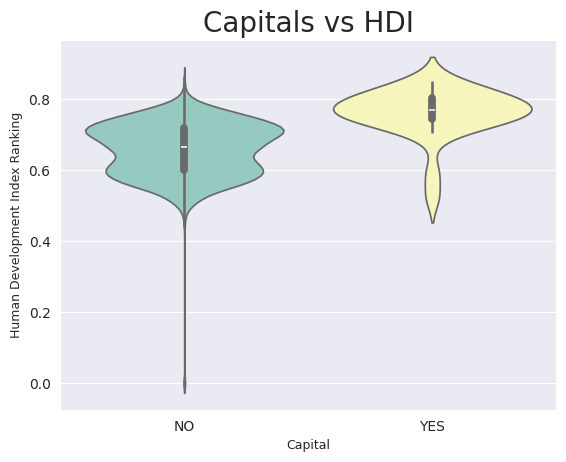

In [25]:
capital_hdi=sns.violinplot(x = 'CAPITAL', y = 'Human Development Index Ranking', data = df, palette = "Set3")
capital_hdi.set_xlabel(xlabel = 'Capital', fontsize = 9)
capital_hdi.set_ylabel(ylabel = 'Human Development Index Ranking', fontsize = 9)
capital_hdi.set_title(label = 'Capitals vs HDI', fontsize = 20)
plt.show()

* As capitais dos estados geralmente possuem uma classificação mais alta no Índice de Desenvolvimento Humano (IDH), frequentemente ultrapassando 0,7, como demonstrado no gráfico acima.

>Distribuição de carros pelo Brasil


Para filtrar as cidades, adotei a condição de que, em média, haja um carro para cada 5 pessoas.

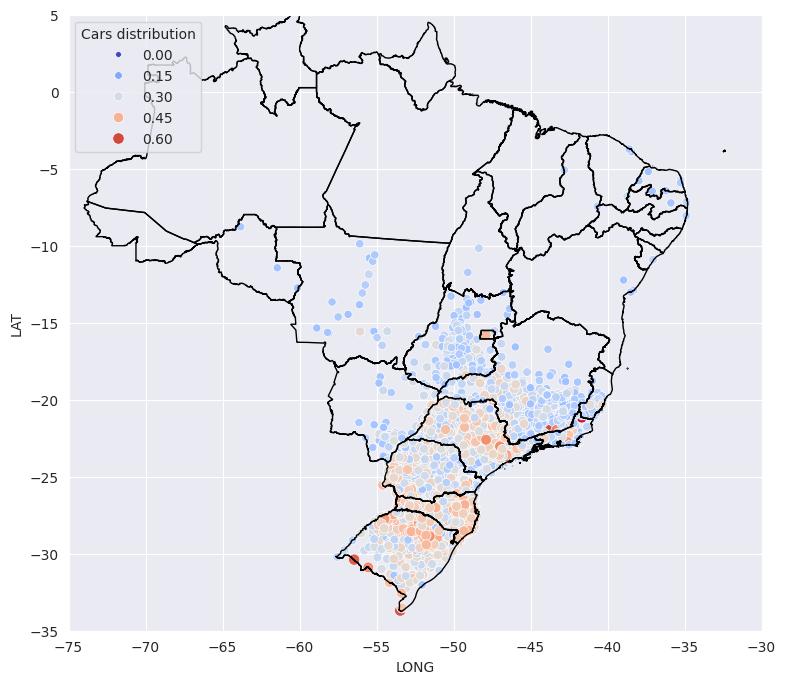

In [26]:
# Load the shapefile of Brazilian states
estados = gpd.read_file("/content/drive/MyDrive/Arquivos Públicos/BR_UF_2021.shx")

# Creating the cars distribution per person
df['Cars distribution'] = (df['Cars']) / (df['Estimated Population(2018)'])

# Set the x and y axis limits to avoid horizontal compression
xlim = (df[df['Cars distribution'] >= 0.20].LONG.min(), df[df['Cars distribution'] >= 0.20].LONG.max())
ylim = (df[df['Cars distribution'] >= 0.20].LAT.min(), df[df['Cars distribution'] >= 0.20].LAT.max())

cmap = 'coolwarm'

# Create the scatter plot
f, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=df[df['Cars distribution'] >= 0.20].LONG,
                y=df[df['Cars distribution'] >= 0.20].LAT,
                palette=cmap,
                hue=df['Cars distribution'],
                size=df['Cars distribution'])

# Plot Brazilian states boundaries
estados.plot(ax=ax, color='none', edgecolor='black')

# Center the image by adjusting the x and y axis limits
plt.xlim(xlim)
plt.ylim(ylim)

# Set the x and y axis limits for the centered area
plt.xlim((-75, -30))
plt.ylim((-35, 5))

plt.show()


* A maior parte da frota de carros no Brasil está concentrada na região Sul-Sudeste do país.


#**5.Encerramento**

Chegamos ao final deste notebook de Análise Exploratória de Dados das cidades do Brasil. Espero que você tenha encontrado as análises e visualizações úteis e informativas!

Agradeço sinceramente por dedicar seu tempo para explorar este notebook. Se você gostou do conteúdo ou tem algum feedback para compartilhar, ficaria muito feliz em ouvi-lo. Se houver algum aspecto que você gostaria de ver mais explorado ou se tiver alguma dúvida, não hesite em entrar em contato.

Atenciosamente,
Michell Piazza.